## Logistic Regression :

### Objective :
* Data Loading
* Data Understanding
* Data Cleaning
* Data Pre-Processing
* Data Visualization
* Building Multivariate Logistic Regression Model

### DATA SET : HR-ANALYTICS

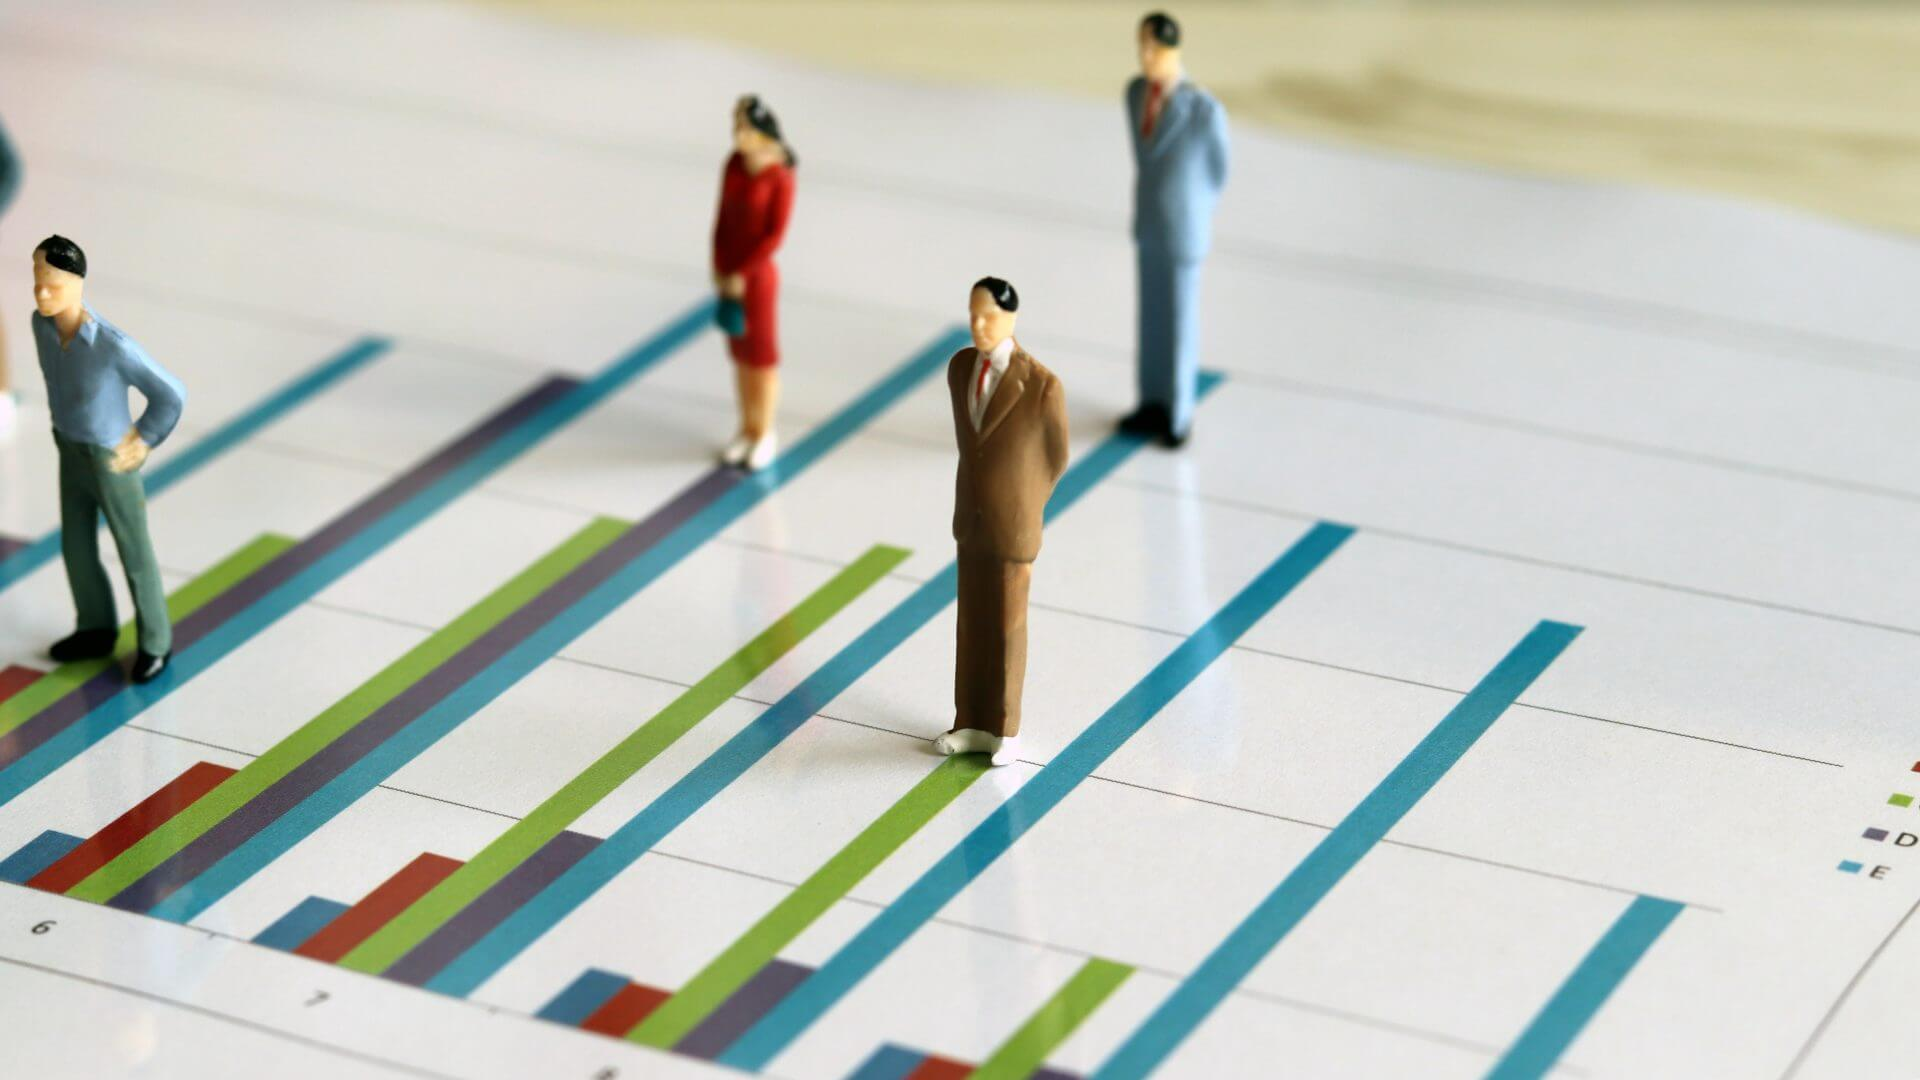

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
df=pd.read_csv('hr-train.csv')
fnltest=pd.read_csv('hr-test.csv')

In [4]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

Viewing the Data :

In [5]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
fnltest.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


Shape of the Given Train Data and Test Data sets :

In [7]:
print('Shape of the Train data :',df.shape)
print('No of Rows    :',df.shape[0])
print('No of columns :',df.shape[1])

Shape of the Train data : (54808, 14)
No of Rows    : 54808
No of columns : 14


In [8]:
print('Shape of the Test data :',fnltest.shape)
print('No of Rows    :',fnltest.shape[0])
print('No of columns :',fnltest.shape[1])

Shape of the Test data : (23490, 13)
No of Rows    : 23490
No of columns : 13


Viewing the Data Types :

In [9]:
print ("Train Data set dtypes :\n")
print(df.dtypes)
print('--------------------------')
print("Test Data set dtypes :\n ")
print(fnltest.dtypes)

Train Data set dtypes :

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object
--------------------------
Test Data set dtypes :
 
employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object


Now consider the Given Train Data :

View the Info :

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [11]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Univariate Analysis :

Viewing the Columns :

In [12]:
for i in df.columns :
    print(i)

employee_id
department
region
education
gender
recruitment_channel
no_of_trainings
age
previous_year_rating
length_of_service
KPIs_met >80%
awards_won?
avg_training_score
is_promoted


consider the Object columns

In [13]:
objcols=df.select_dtypes('object')
objcols.head()

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other


In [14]:
for i in objcols.columns :
    print(i,'has',objcols[i].nunique(),'levels \n','Values:',objcols[i].unique())
    print('---------------------------------------------------\n')

department has 9 levels 
 Values: ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
---------------------------------------------------

region has 34 levels 
 Values: ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
---------------------------------------------------

education has 3 levels 
 Values: ["Master's & above" "Bachelor's" nan 'Below Secondary']
---------------------------------------------------

gender has 2 levels 
 Values: ['f' 'm']
---------------------------------------------------

recruitment_channel has 3 levels 
 Values: ['sourcing' 'other' 'referred']
---------

Viewing The Value_counts for the Object columns :

In [15]:
for i in objcols.columns:
    print('column Name :',i,'\n',df[i].value_counts(dropna=False),'\n-----------------------------------------')

column Name : department 
 Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64 
-----------------------------------------
column Name : region 
 region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region

In [16]:
for i in objcols.columns:
    print('column Name :',i,'\n',fnltest[i].value_counts(dropna=False),'\n-----------------------------------------')

column Name : department 
 Sales & Marketing    7315
Operations           4764
Procurement          3020
Technology           3011
Analytics            2319
Finance              1091
HR                   1085
Legal                 445
R&D                   440
Name: department, dtype: int64 
-----------------------------------------
column Name : region 
 region_2     5299
region_22    2739
region_7     1982
region_13    1167
region_15    1130
region_26    1011
region_31     844
region_4      775
region_27     710
region_28     595
region_16     590
region_11     571
region_23     516
region_32     433
region_29     414
region_19     410
region_17     361
region_14     350
region_5      342
region_25     337
region_20     326
region_6      298
region_30     273
region_8      269
region_10     269
region_1      238
region_24     219
region_12     215
region_9      180
region_21     179
region_34     155
region_3      147
region_33     126
region_18      20
Name: region, dtype: int64 
--

Numeric Columns :

In [17]:
numcols=df.select_dtypes(np.number)
numcols.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


In [18]:
# Let's consider the Age,avg_training_score columns because other columns are discrete 
numcols[['age','avg_training_score']].describe()

,age,avg_training_score
count,54808.000000,54808.000000
mean,34.803915,63.386750
std,7.660169,13.371559
min,20.000000,39.000000
25%,29.000000,51.000000
50%,33.000000,60.000000
75%,39.000000,76.000000
max,60.000000,99.000000


 Cheecking for the Outliers :
 
 To Identify the Outliers we will draw Box_plots :

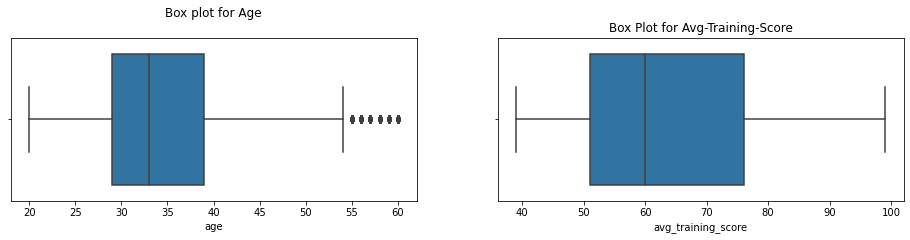

In [19]:
plt.figure(figsize=(16,3))
plt.subplot(1,2,1)
sns.boxplot(df.age)
plt.title("Box plot for Age\n")

plt.subplot(1,2,2)
sns.boxplot(df.avg_training_score)
plt.title("Box Plot for Avg-Training-Score")

plt.show()


We can see that there are no ouliers for the Avg-Traing-score and 50% of the data fall below the 60 avg-training-score ,
although the box plot is showing the outliers for the column Age we won't treat them as outliers.

Checking the Null Values :

In [20]:
# Train set :
print("Train set Null Values :")
df.isnull().sum().sort_values(ascending=False)

Train set Null Values :


previous_year_rating    4124
education               2409
employee_id                0
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [21]:
# Test set :
print("Test set Null values :")
fnltest.isnull().sum().sort_values(ascending=False)

Test set Null values :


previous_year_rating    1812
education               1034
employee_id                0
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

We can see that the columns 'Prevous_year_rating' and 'education' are having Null values in both the given train and Test Data sets.

In [22]:
# Let's look at how to impute the Missing values for the columns :
df[df.previous_year_rating.isnull() & df.education.isnull()].shape

(385, 14)

We can see that there are 385 rows where both the columns are having Missing Values.

In [23]:
# Let's look at Individually : 
df[~df.previous_year_rating.isnull()].head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


Instead of Imputing with the Mean and Median values let's go with the Weight of Evidence :

In [24]:
# consider only the Previous_year_rating and Is_Promoted columns :
prvs=df[['previous_year_rating','is_promoted']]
prvs.head()

,previous_year_rating,is_promoted
0,5.0,0
1,5.0,0
2,3.0,0
3,1.0,0
4,3.0,0


In [25]:
prvs.isnull().sum()

previous_year_rating    4124
is_promoted                0
dtype: int64

In [26]:
prvs.previous_year_rating=prvs.previous_year_rating.astype('object')
prvs.dtypes

previous_year_rating    object
is_promoted              int64
dtype: object

In [27]:
prvs.is_promoted.groupby(prvs.previous_year_rating).value_counts()

previous_year_rating  is_promoted
1.0                   0               6135
                      1                 88
2.0                   0               4044
                      1                181
3.0                   0              17263
                      1               1355
4.0                   0               9093
                      1                784
5.0                   0               9820
                      1               1921
Name: is_promoted, dtype: int64

In [28]:
prvs[prvs.previous_year_rating.isnull()]['is_promoted'].value_counts()

0    3785
1     339
Name: is_promoted, dtype: int64

In [29]:
# For Prvs-year rating==1:
a= np.log(88/(88+6135)) - np.log(6135/(88+6135))
# If rating == 2 :
b=np.log(181/(181+4044))-np.log(4044/(181+4044))
# If rating ==3 :
c=np.log(1355/(1355+17263))-np.log(17263/(1355+17263))
# if rating == 4:
d=np.log(784/(784+9093))-np.log(9093/(784+9093))
# If rating == 5 :
e= np.log(1921/(1921+9820)) - np.log(9820/(1921+9820))
# If rating == Missing :
f=np.log(339/(339+3785)) - np.log(3785/(339+3785))

woe=[a,b,c,d,e,f]
woe

[-4.244428542666805,
 -3.1064925488745363,
 -2.5447640285027475,
 -2.450851145375505,
 -1.631575238579955,
 -2.412801058491099]

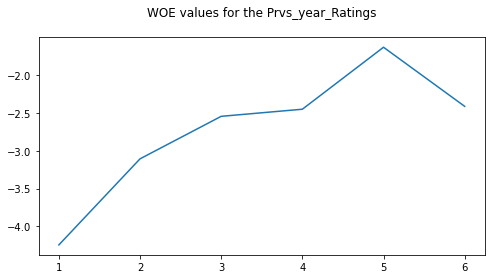

In [30]:
plt.figure(figsize=(8,4))
plt.plot(range(1,7),woe)
plt.title("WOE values for the Prvs_year_Ratings\n")
plt.show()

As we can see that the last woe value i.e., 6th value rating is some what similar to the rating 4. so we can impute the missing values of the Prvs-year-ratings by the value of 4 by the WOE analysis.

In [31]:
# Imputing the Previous_year_rating with 4 for both the Train and Test sets :
df.previous_year_rating.fillna(4,inplace=True)
fnltest.previous_year_rating.fillna(4,inplace=True)
print("Train :",df.previous_year_rating.value_counts(dropna=False))
print("Test :",fnltest.previous_year_rating.value_counts(dropna=False))

Train : 3.0    18618
4.0    14001
5.0    11741
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64
Test : 3.0    7921
4.0    6061
5.0    5097
1.0    2680
2.0    1731
Name: previous_year_rating, dtype: int64


In [32]:
# consider only the education and Is-promoted columns :
edu=df[['education','is_promoted']]
edu.head()

,education,is_promoted
0,Master's & above,0
1,Bachelor's,0
2,Bachelor's,0
3,Bachelor's,0
4,Bachelor's,0


In [33]:
edu.isnull().sum()

education      2409
is_promoted       0
dtype: int64

In [34]:
edu.education.fillna('Missing',inplace=True)

In [35]:
edu.is_promoted.groupby(edu.education).value_counts()

education         is_promoted
Bachelor's        0              33661
                  1               3008
Below Secondary   0                738
                  1                 67
Master's & above  0              13454
                  1               1471
Missing           0               2287
                  1                122
Name: is_promoted, dtype: int64

In [36]:
# Calculating the woe values :
#If edu=='Bachelor's :
a=np.log(3008/(3008+33661))-np.log(33661/(3008+33661))
# if edu == 'Below secondary' :
b=np.log(67/(67+738))-np.log(738/(67+738))
# If edu == 'Master's and above ' :
c=np.log(1471/(1471+13454))-np.log(13454/1471+13454)
# If edu == 'missing' :
d=np.log(122/(122+2287)) - np.log(2287/(122+2287))
woe=[a,b,c,d]
woe

[-2.4150644910870054,
 -2.3992512052095067,
 -11.8248065349323,
 -2.930975149289525]

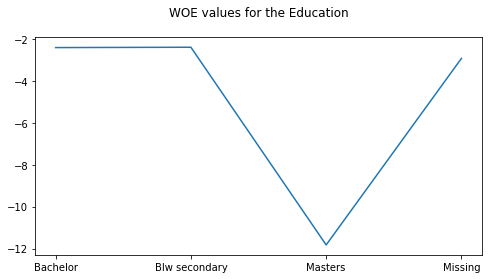

In [37]:
l=['Bachelor','Blw secondary','Masters','Missing']
plt.figure(figsize=(8,4))
plt.plot(l,woe)
plt.title("WOE values for the Education\n")
plt.show()

By WOE Analysis we will impute the Missing values of education by bachelor's .

In [38]:
# Imputing the Missing values of education for both the train and Test sets :
df.education.fillna("Bachelor's",inplace=True)
fnltest.fillna("Bachelor's",inplace=True)
print("Train :\n",df.education.value_counts(dropna=False))
print("Test :\n",fnltest.education.value_counts(dropna=False))

Train :
 Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64
Test :
 Bachelor's          16612
Master's & above     6504
Below Secondary       374
Name: education, dtype: int64


In [39]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

Visualizing the Data :

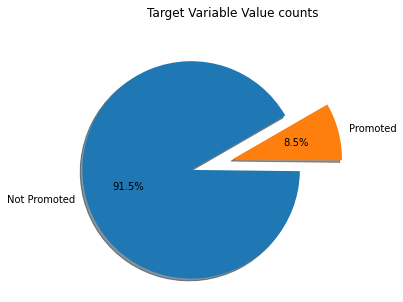

In [40]:
plt.figure(figsize=(8,5))
plt.pie(df.is_promoted.value_counts(),startangle=30,explode=[0.4,0],shadow=True,
        labels=['Not Promoted','Promoted'],autopct='%1.1f%%')
plt.title("Target Variable Value counts")
plt.show()

We can see that the Target Variable is some what Imbalanced Data , so we need to consider this and we will use stratified split.

In [41]:
# Let's divide the data in to two sets which are Not-promoted and Promoted 
prmtd=df[df.is_promoted==1]
ntprmtd=df[df.is_promoted==0]
print("Not Promoted Data :",ntprmtd.shape)
print("Promoted Data :",prmtd.shape)

Not Promoted Data : (50140, 14)
Promoted Data : (4668, 14)


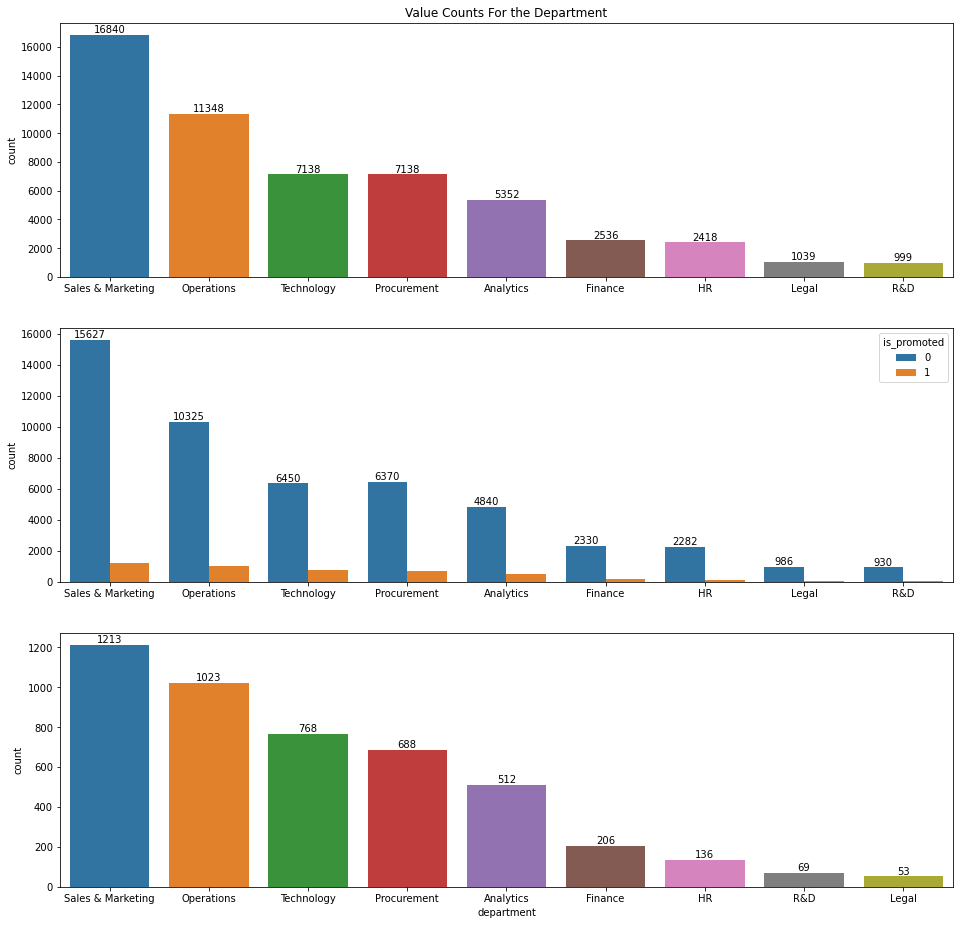

In [42]:
# Let's start with Department :
plt.figure(figsize=(16,12))
plt.subplot(3,1,1)
ax=sns.countplot('department', order=df.department.value_counts(ascending=False).index,data=df)
abs_values = df['department'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title("Value Counts For the Department")
plt.xlabel("")


plt.subplot(3,1,2)
ax=sns.countplot('department',hue='is_promoted', order=df.department.value_counts(ascending=False).index,data=df)
abs_values = ntprmtd['department'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xlabel("")

plt.subplot(3,1,3)
ax=sns.countplot('department', order=prmtd.department.value_counts(ascending=False).index,data=prmtd)
abs_values = prmtd.department.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)


plt.subplots_adjust(top=1.8,bottom=0.8)
plt.show()

We can see that Most of the Employees are from the Sales&Market and those who are promoted are also from the Sales&Market

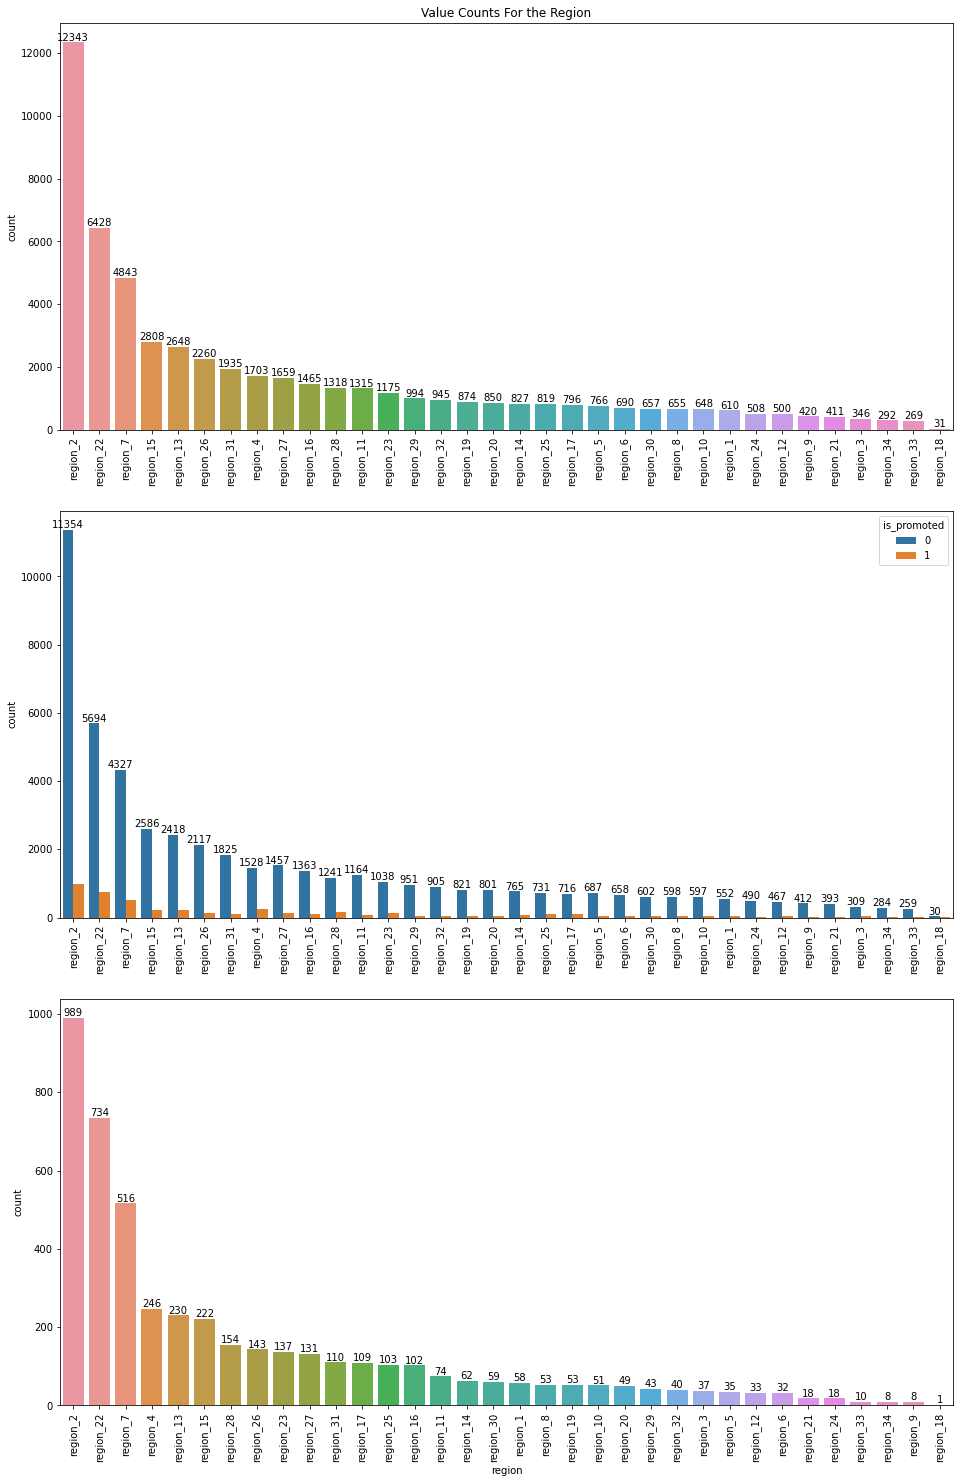

In [43]:
# Region :
plt.figure(figsize=(16,12))
plt.subplot(3,1,1)
ax=sns.countplot('region', order=df.region.value_counts(ascending=False).index,data=df)
abs_values = df.region.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xticks(rotation=90)
plt.title("Value Counts For the Region")
plt.xlabel("")


plt.subplot(3,1,2)
ax=sns.countplot('region',hue='is_promoted', order=df.region.value_counts(ascending=False).index,data=df)
abs_values = ntprmtd.region.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xticks(rotation=90)
plt.xlabel("")

plt.subplot(3,1,3)
ax=sns.countplot('region', order=prmtd.region.value_counts(ascending=False).index,data=prmtd)
abs_values = prmtd.region.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xticks(rotation=90)

plt.subplots_adjust(top=2.2,bottom=0.6)
plt.show()

We can see that Most of the Employees are from the region_2 and  those who are promoted are also from the region_2

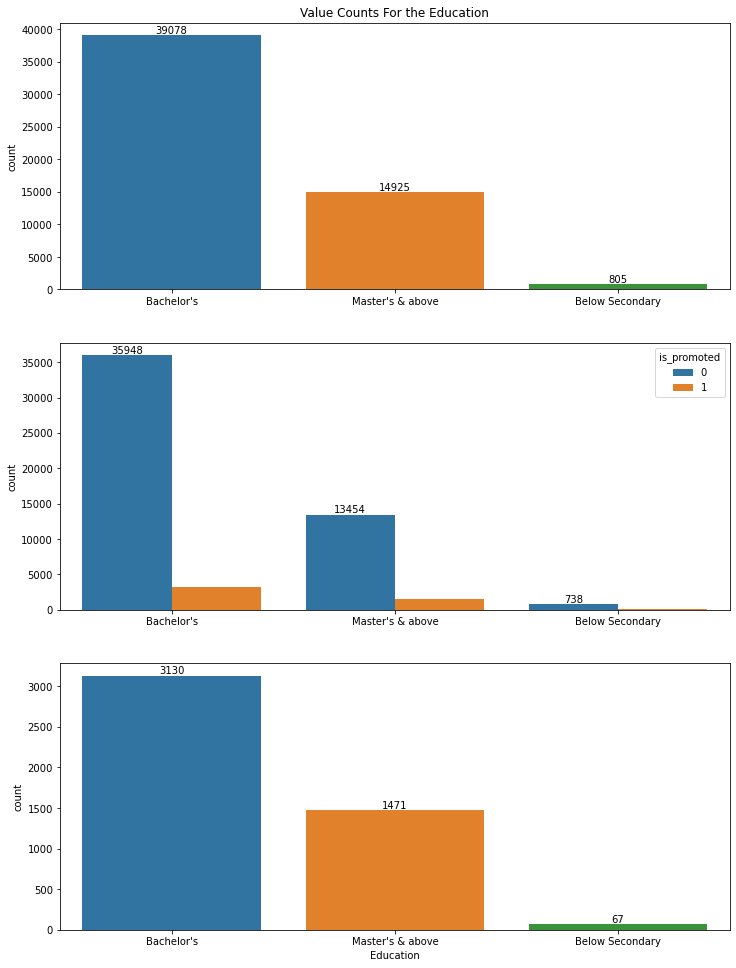

In [44]:
# Education :
plt.figure(figsize=(12,9))
plt.subplot(3,1,1)
ax=sns.countplot('education', order=df.education.value_counts(ascending=False).index,data=df)
abs_values = df.education.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title("Value Counts For the Education")
plt.xlabel("")


plt.subplot(3,1,2)
ax=sns.countplot('education',hue='is_promoted', order=df.education.value_counts(ascending=False).index,data=df)
abs_values = ntprmtd.education.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xlabel("")

plt.subplot(3,1,3)
ax=sns.countplot('education', order=prmtd.education.value_counts(ascending=False).index,data=prmtd)
abs_values = prmtd.education.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xlabel("Education")

plt.subplots_adjust(top=2.2,bottom=0.8)
plt.show()

We can see that Most of them are from the Bachelor's Eduaction so there are more members promoted with the Education level of Bachelor's

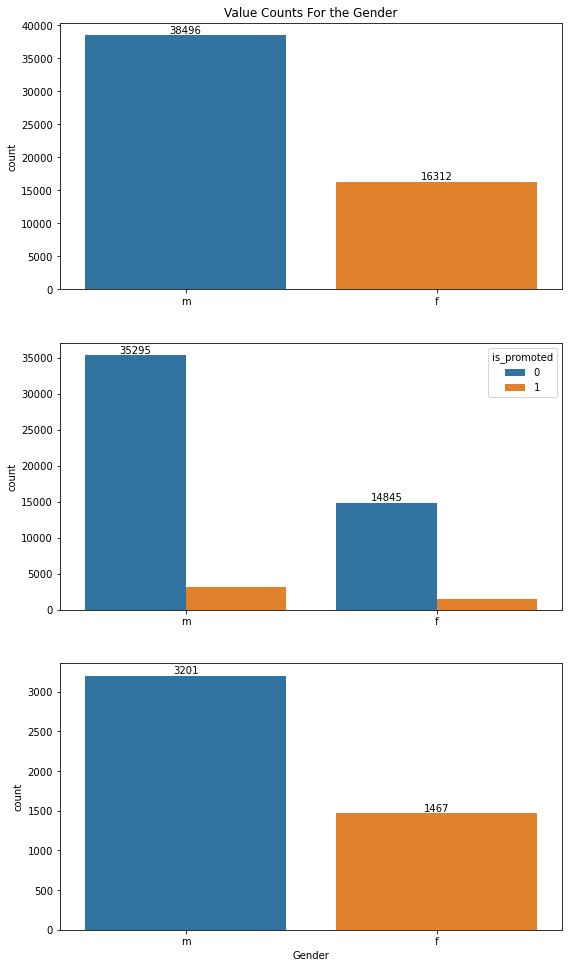

In [45]:
# Gender :
plt.figure(figsize=(9,9))
plt.subplot(3,1,1)
ax=sns.countplot('gender', order=df.gender.value_counts(ascending=False).index,data=df)
abs_values = df.gender.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title("Value Counts For the Gender")
plt.xlabel("")


plt.subplot(3,1,2)
ax=sns.countplot('gender',hue='is_promoted', order=df.gender.value_counts(ascending=False).index,data=df)
abs_values = ntprmtd.gender.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xlabel("")

plt.subplot(3,1,3)
ax=sns.countplot('gender', order=prmtd.gender.value_counts(ascending=False).index,data=prmtd)
abs_values = prmtd.gender.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xlabel("Gender")

plt.subplots_adjust(top=2.2,bottom=0.8)
plt.show()

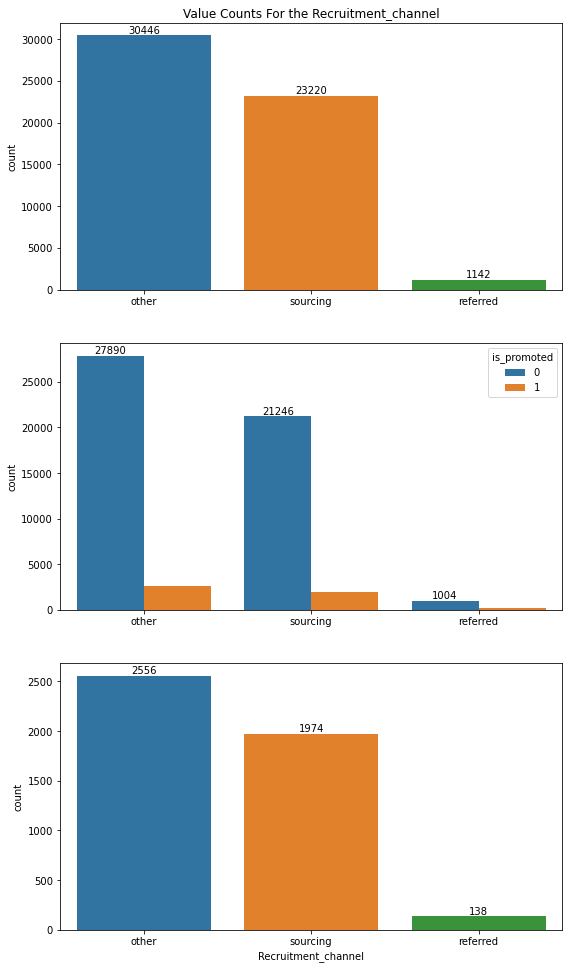

In [46]:
# recruitment_channel :
plt.figure(figsize=(9,9))
plt.subplot(3,1,1)
ax=sns.countplot('recruitment_channel', order=df.recruitment_channel.value_counts(ascending=False).index,data=df)
abs_values = df.recruitment_channel.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title("Value Counts For the Recruitment_channel")
plt.xlabel("")


plt.subplot(3,1,2)
ax=sns.countplot('recruitment_channel',hue='is_promoted', order=df.recruitment_channel.value_counts(ascending=False).index,data=df)
abs_values = ntprmtd.recruitment_channel.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xlabel("")

plt.subplot(3,1,3)
ax=sns.countplot('recruitment_channel', order=prmtd.recruitment_channel.value_counts(ascending=False).index,data=prmtd)
abs_values = prmtd.recruitment_channel.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xlabel("Recruitment_channel")

plt.subplots_adjust(top=2.2,bottom=0.8)
plt.show()

We see that most of them are from the Others Recruitment_channel and  those who are promoted are also from the Others

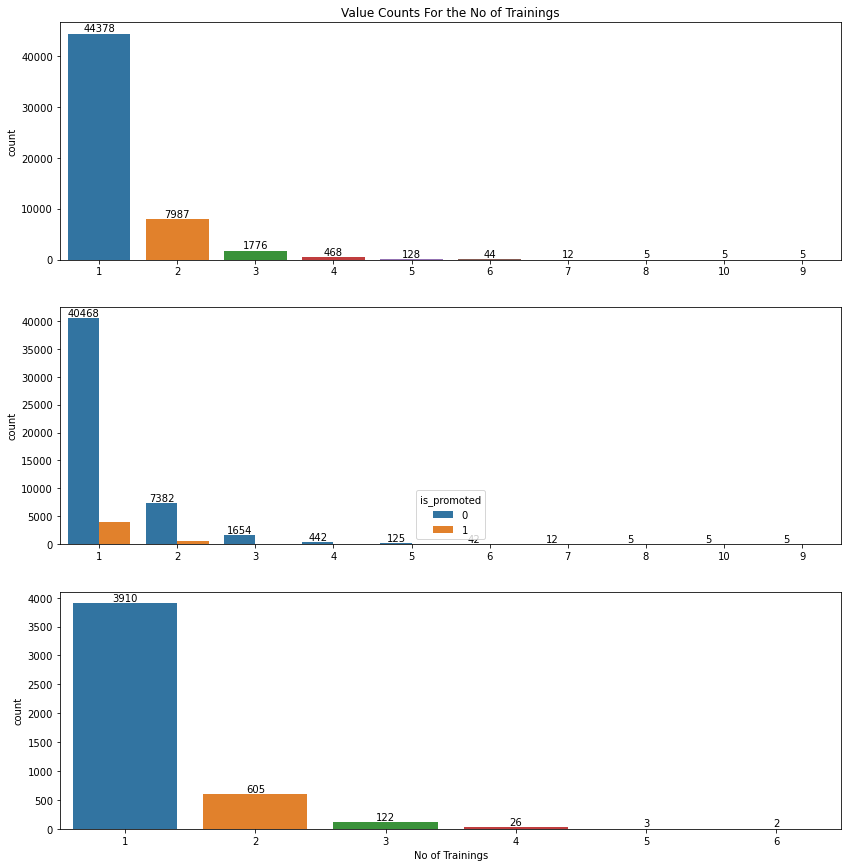

In [47]:
# No-of-Trainings :
plt.figure(figsize=(14,7))
plt.subplot(3,1,1)
ax=sns.countplot('no_of_trainings', order=df.no_of_trainings.value_counts(ascending=False).index,data=df)
abs_values = df.no_of_trainings.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title("Value Counts For the No of Trainings")
plt.xlabel("")


plt.subplot(3,1,2)
ax=sns.countplot('no_of_trainings',hue='is_promoted', order=df.no_of_trainings.value_counts(ascending=False).index,data=df)
abs_values = ntprmtd.no_of_trainings.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xlabel("")

plt.subplot(3,1,3)
ax=sns.countplot('no_of_trainings', order=prmtd.no_of_trainings.value_counts(ascending=False).index,data=prmtd)
abs_values = prmtd.no_of_trainings.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xlabel("No of Trainings")

plt.subplots_adjust(top=2.4,bottom=0.8)
plt.show()

We see that those who undergone Trainings from 1 to 6 times are promoted.

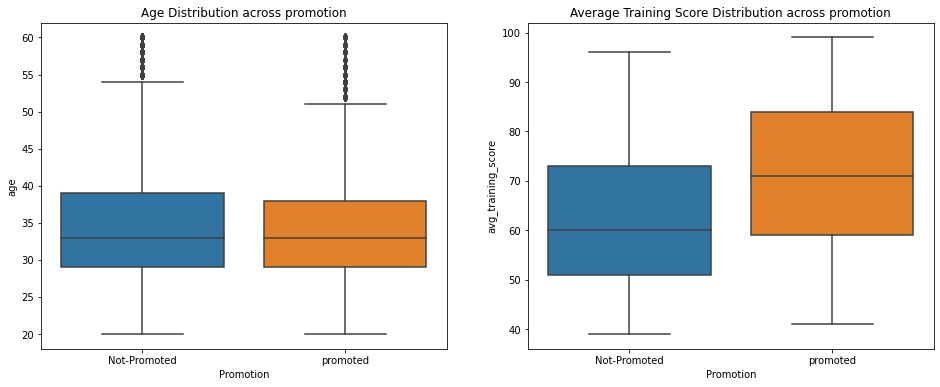

In [48]:
# Age & Avg_Training_score :
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(x=df.is_promoted,y=df.age)
plt.title("Age Distribution across promotion")
plt.xticks([0,1],['Not-Promoted','promoted'])
plt.xlabel("Promotion")

plt.subplot(1,2,2)
sns.boxplot(x=df.is_promoted,y=df.avg_training_score)
plt.title("Average Training Score Distribution across promotion")
plt.xticks([0,1],['Not-Promoted','promoted'])
plt.xlabel("Promotion")

plt.show()

As we can see that there is no significant difference in the Age Distribution across the Promotion and for the Training score 
the Median Avg_Training_score is higher for those who are promoted .

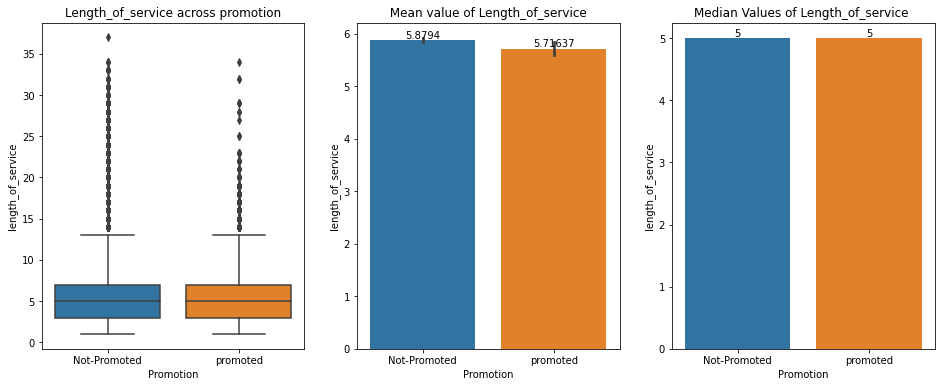

In [49]:
# Length of service :
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.boxplot(x=df.is_promoted,y=df.length_of_service)
plt.title("Length_of_service across promotion")
plt.xticks([0,1],['Not-Promoted','promoted'])
plt.xlabel("Promotion")

plt.subplot(1,3,2)
fig=sns.barplot(y='length_of_service',x='is_promoted',data=df,estimator=np.mean)
plt.title(" Mean value of Length_of_service ")
plt.xticks([0,1],['Not-Promoted','promoted'])
fig.bar_label(fig.containers[0])
plt.xlabel("Promotion")

plt.subplot(1,3,3)
fig=sns.barplot(y='length_of_service',x='is_promoted',data=df,estimator=np.median)
plt.title("Median Values of Length_of_service ")
plt.xticks([0,1],['Not-Promoted','promoted'])
fig.bar_label(fig.containers[0])
plt.xlabel("Promotion")

plt.show()

we can see that there is no significant difference in the distributions of Length_of_service for the Two subsets.

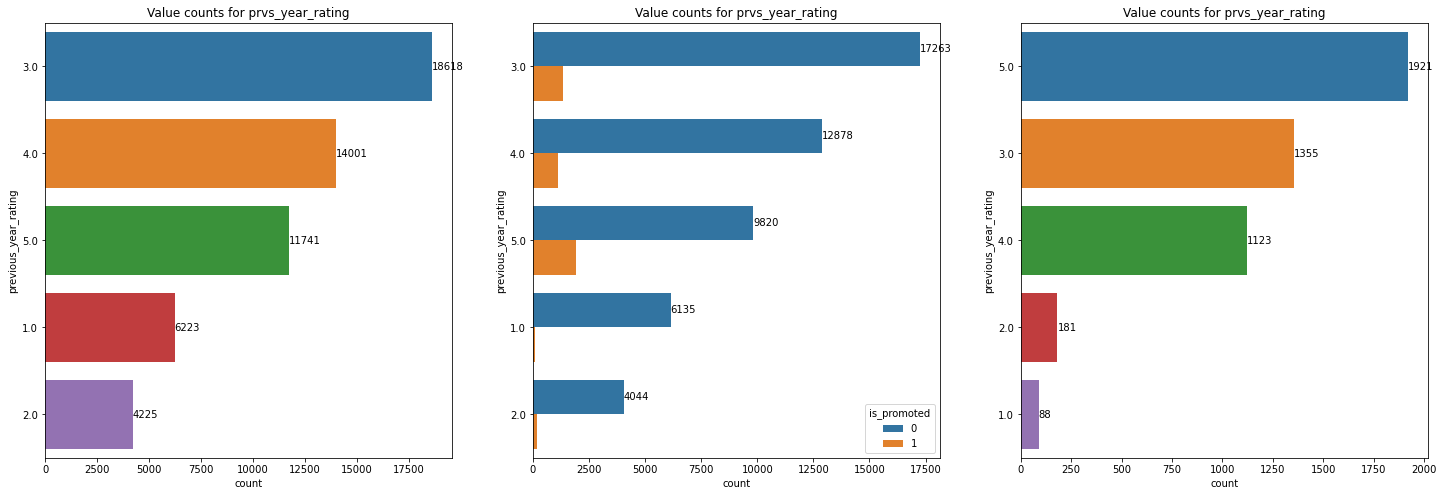

In [50]:
# Previous_year_Rating :

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
ax=sns.countplot(y='previous_year_rating',data=df,order=df.previous_year_rating.value_counts().index)
abs_values = df.previous_year_rating.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title("Value counts for prvs_year_rating")

plt.subplot(1,3,2)
ax=sns.countplot(y='previous_year_rating',data=df,hue=df.is_promoted,order=df.previous_year_rating.value_counts().index)
abs_values = ntprmtd.previous_year_rating.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title("Value counts for prvs_year_rating")


plt.subplot(1,3,3)
ax=sns.countplot(y='previous_year_rating',data=prmtd,order=prmtd.previous_year_rating.value_counts().index)
abs_values = prmtd.previous_year_rating.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title("Value counts for prvs_year_rating")


plt.subplots_adjust(right=2.4,left=0.8)

plt.show()

We can see that Most of the employees are havingwho the prvs_year_rating 3 and those who are promoted are having prvs-year-rating is 5

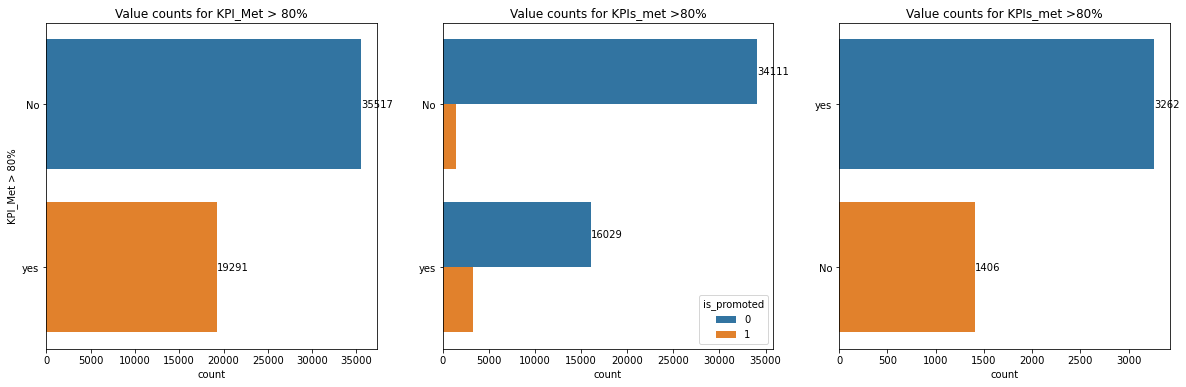

In [51]:
# KPIs_met > 80% :

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
ax=sns.countplot(y='KPIs_met >80%',data=df,order=df['KPIs_met >80%'].value_counts().index)
abs_values = df['KPIs_met >80%'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title("Value counts for KPI_Met > 80%")
plt.yticks([0,1],['No','yes'])
plt.ylabel("KPI_Met > 80%")

plt.subplot(1,3,2)
ax=sns.countplot(y='KPIs_met >80%',data=df,hue=df.is_promoted,order=df['KPIs_met >80%'].value_counts().index)
abs_values = ntprmtd['KPIs_met >80%'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title("Value counts for KPIs_met >80%")
plt.yticks([0,1],['No','yes'])
plt.ylabel("")

plt.subplot(1,3,3)
ax=sns.countplot(y='KPIs_met >80%',data=prmtd,order=prmtd['KPIs_met >80%'].value_counts().index)
abs_values = prmtd['KPIs_met >80%'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title("Value counts for KPIs_met >80%")
plt.yticks([1,0],['No','yes'])
plt.ylabel("")

plt.subplots_adjust(right=2,left=0.7)

plt.show()


We can see that most of the employees are not having KPI% > 80% and the proportion of those who are promoted are having KPI% > 80%.

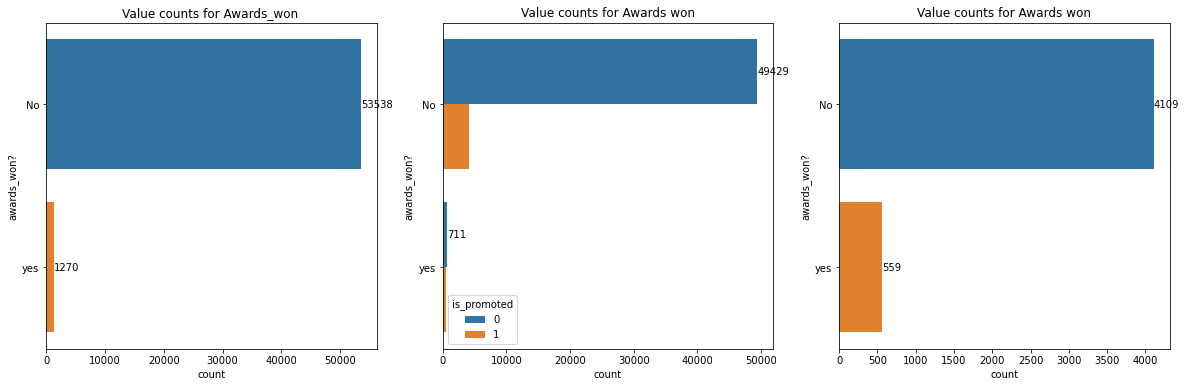

In [52]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
ax=sns.countplot(y='awards_won?',data=df,order=df['awards_won?'].value_counts().index)
abs_values = df['awards_won?'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title("Value counts for Awards_won ")
plt.yticks([0,1],['No','yes'])

plt.subplot(1,3,2)
ax=sns.countplot(y='awards_won?',data=df,hue=df.is_promoted,order=df['awards_won?'].value_counts().index)
abs_values = ntprmtd['awards_won?'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title("Value counts for Awards won")
plt.yticks([0,1],['No','yes'])

plt.subplot(1,3,3)
ax=sns.countplot(y='awards_won?',data=prmtd,order=prmtd['awards_won?'].value_counts().index)
abs_values = prmtd['awards_won?'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title("Value counts for Awards won")
plt.yticks([0,1],['No','yes'])


plt.subplots_adjust(right=2,left=0.7)

plt.show()

Out of employees who are promoted only 559 members recieved Awards.

In [53]:
numcols.drop('employee_id',axis=1,inplace=True)
numcols.head(4)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1,35,5.0,8,1,0,49,0
1,1,30,5.0,4,0,0,60,0
2,1,34,3.0,7,0,0,50,0
3,2,39,1.0,10,0,0,50,0


Pair Plot :

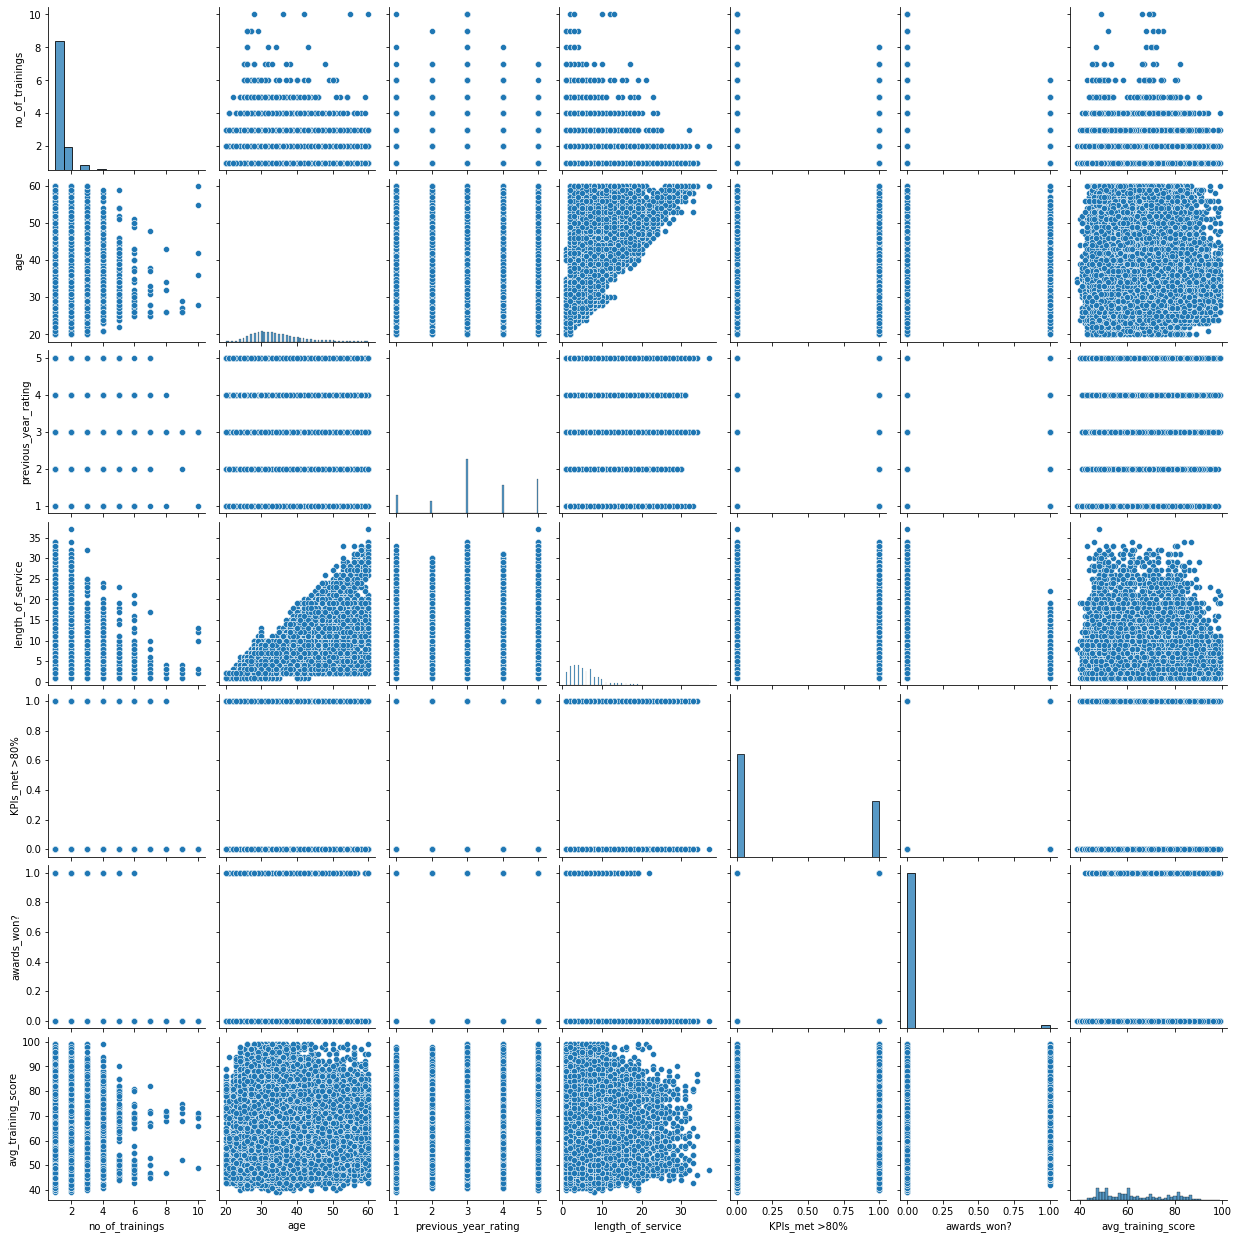

In [54]:
sns.pairplot(numcols[numcols.columns[numcols.columns != 'is_promoted']])
plt.show()

Correlation Map :

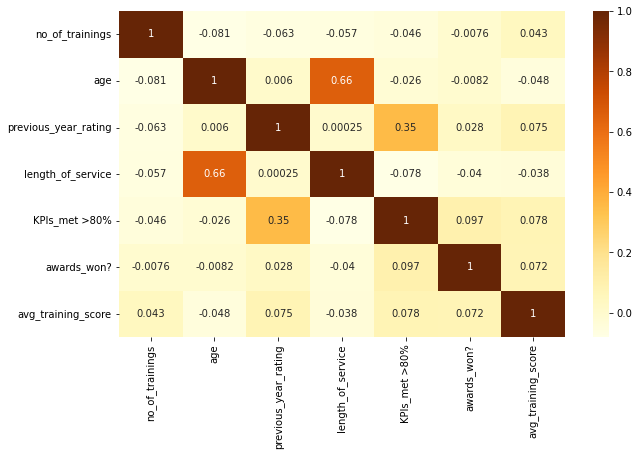

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(numcols[numcols.columns[numcols.columns != 'is_promoted']].corr(),cmap='YlOrBr',annot=True)
plt.show()

We can see that there is no high correlation between the Variables.

In [56]:
# Let's look at the object columns :
objcols.head(3)

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing


In [57]:
for i in objcols.columns :
    print(i,"values",objcols[i].unique())
    print('-------------------------------------')

department values ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
-------------------------------------
region values ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
-------------------------------------
education values ["Master's & above" "Bachelor's" nan 'Below Secondary']
-------------------------------------
gender values ['f' 'm']
-------------------------------------
recruitment_channel values ['sourcing' 'other' 'referred']
-------------------------------------


we can see that gender has two levels so we can use Binary map and for others we will do one hot encoding.

In [58]:
# mapping the 'f' : 0 and 'm' : 1 for both the given Train and Test datasets :
df.gender=df.gender.map({'f':0,'m':1})
fnltest.gender=fnltest.gender.map({'f':0,'m':1})
print("Train :",df.gender.head(4))
print("Test :",fnltest.gender.head(4))

Train : 0    0
1    1
2    1
3    1
Name: gender, dtype: int64
Test : 0    1
1    0
2    1
3    0
Name: gender, dtype: int64


In [59]:
# Creating Dummy variables for the Given Train set :
dummy1=pd.get_dummies(df[objcols.columns[objcols.columns != 'gender']])
dummy1.head()

,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [60]:
dummy1.sum().sort_values(ascending=True)

region_region_18                   31
region_region_33                  269
region_region_34                  292
region_region_3                   346
region_region_21                  411
region_region_9                   420
region_region_12                  500
region_region_24                  508
region_region_1                   610
region_region_10                  648
region_region_8                   655
region_region_30                  657
region_region_6                   690
region_region_5                   766
region_region_17                  796
education_Below Secondary         805
region_region_25                  819
region_region_14                  827
region_region_20                  850
region_region_19                  874
region_region_32                  945
region_region_29                  994
department_R&D                    999
department_Legal                 1039
recruitment_channel_referred     1142
region_region_23                 1175
region_regio

In [61]:
l=['region_region_18','education_Below Secondary','department_R&D','recruitment_channel_referred']
print("before dropping dummy1 shape :",dummy1.shape)
dummy1.drop(l,axis=1,inplace=True)
print("After dropping dummy1 shape :",dummy1.shape)

before dropping dummy1 shape : (54808, 49)
After dropping dummy1 shape : (54808, 45)


In [62]:
# Creating Dummy variables for the Given Test set :
dummy2=pd.get_dummies(fnltest[objcols.columns[objcols.columns != 'gender']])
dummy2.head()

,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [63]:
l=['region_region_18','education_Below Secondary','department_R&D','recruitment_channel_referred']
print("before dropping dummy1 shape :",dummy2.shape)
dummy2.drop(l,axis=1,inplace=True)
print("After dropping dummy1 shape :",dummy2.shape)

before dropping dummy1 shape : (23490, 49)
After dropping dummy1 shape : (23490, 45)


Concatinating the Dummy variables to the Original DataFrame :

In [64]:
# For the Given Train Set :
print("Before Adding No of columns :",df.shape[1])
dfnl=pd.concat([df,dummy1],axis=1)
print("After Adding No of columns :",dfnl.shape[1])

Before Adding No of columns : 14
After Adding No of columns : 59


In [65]:
# For the Given Test Set :
print("Before Adding No of columns :",fnltest.shape[1])
tfnl=pd.concat([fnltest,dummy2],axis=1)
print("After Adding No of columns :",tfnl.shape[1])

Before Adding No of columns : 13
After Adding No of columns : 58


Now we need to extract the X and y :

In [66]:
# For X we need to drop the original columns which are dummy encoded : Test set
l=['employee_id','department', 'region', 'education','recruitment_channel','is_promoted']
X=dfnl.drop(l,axis=1)
y=dfnl.is_promoted
print("X shape :",X.shape)
print("y shape :",y.shape)

X shape : (54808, 53)
y shape : (54808,)


In [67]:
# For final Test set :
l1=['employee_id','department', 'region', 'education','recruitment_channel']
Xfnl=tfnl.drop(l1,axis=1)
print("Xfnl shape :",Xfnl.shape)

Xfnl shape : (23490, 53)


In [68]:
X.columns==Xfnl.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

we come back to this Xfnl after evaluating on the Validation set(we need to subset a test data from the given Training data).

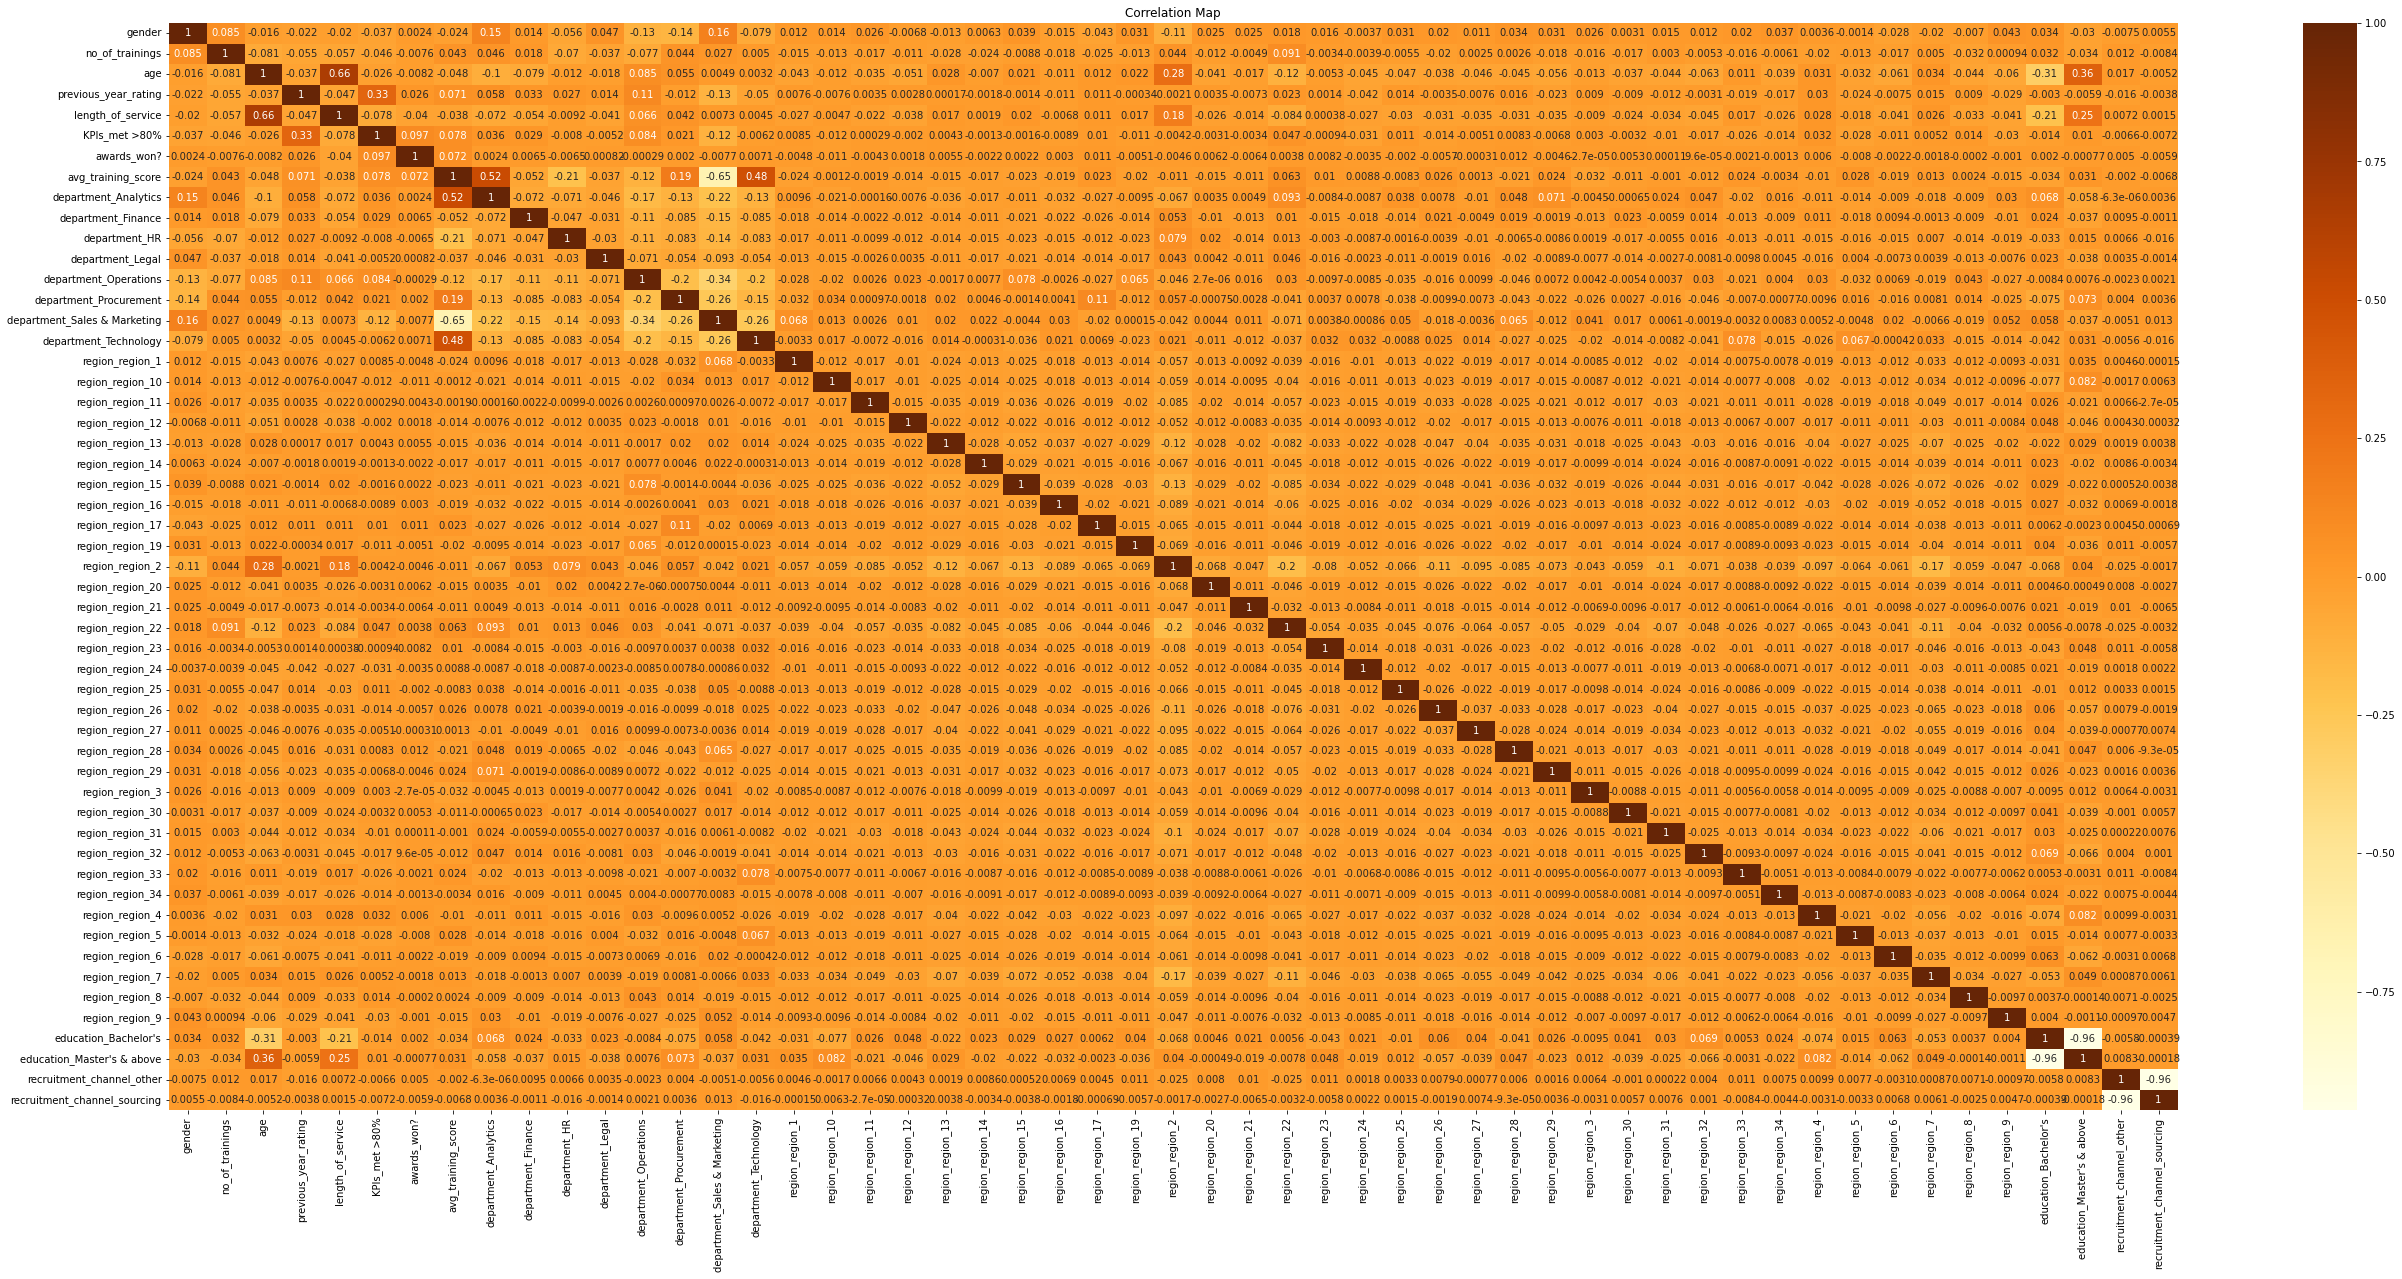

In [69]:
plt.figure(figsize=(45,20))
sns.heatmap(X.corr(),
           cmap='YlOrBr', annot=True)
plt.title("Correlation Map")
plt.show()

            -------------------------------------------------------------------------------------------------

Train-Test split :

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)

In [71]:
print('X_train shape :',X_train.shape)
print('y_train shape :',y_train.shape)
print('X_test shape :',X_test.shape)
print('y_test shape :',y_test.shape)

X_train shape : (43846, 53)
y_train shape : (43846,)
X_test shape : (10962, 53)
y_test shape : (10962,)


Building the Base Model Using all the Variables :

Logistic Regression Using Sklearn :

In [72]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [73]:
logmdl=log.fit(X_train,y_train)
logmdl.score(X_train,y_train)

0.9173698855083702

We are getting 91% accuracy it looks like good, but for classification Accuracy is not a good Measure

In [74]:
from sklearn.metrics import classification_report,plot_roc_curve,confusion_matrix,roc_auc_score

In [75]:
# Let's look for the Train set Perfoemance :
print(classification_report(y_train,logmdl.predict(X_train)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     40112
           1       0.55      0.16      0.25      3734

    accuracy                           0.92     43846
   macro avg       0.74      0.57      0.60     43846
weighted avg       0.89      0.92      0.90     43846



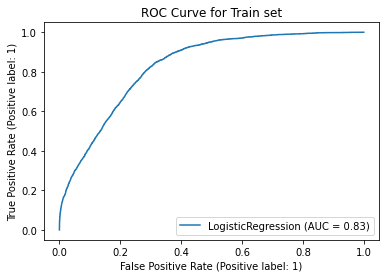

In [76]:
plot_roc_curve(logmdl,X_train,y_train)
plt.title("ROC Curve for Train set")
plt.show()

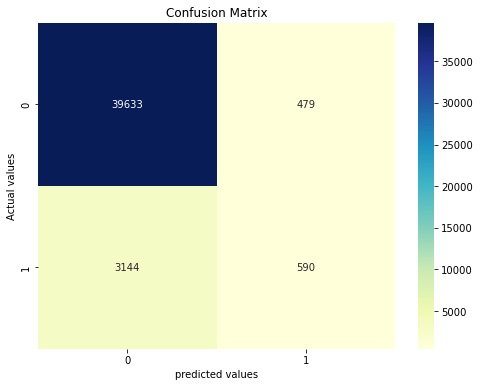

In [77]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_train,logmdl.predict(X_train)),annot=True,fmt='d',cmap="YlGnBu")
plt.xlabel("predicted values")
plt.ylabel("Actual values")
plt.title("Confusion Matrix")
plt.show()

Let's apply cross validation scheme based on the ROCAUC score :

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
cross_val_score(estimator=logmdl,X=X_train,y=y_train,cv=5,scoring="roc_auc",n_jobs=-1)

array([0.82765229, 0.82984092, 0.82305137, 0.82105385, 0.83047064])

We see that our Basic model is somewhat stable of approx 0.82 ROCAUC with the cutoff 0.5

Let's do Feature selection based on RFECV on ROCAUC score :

In [80]:
from sklearn.feature_selection import RFECV
rfe_acc=RFECV(estimator=log,cv=4,n_jobs=-1)
rfe_roc=RFECV(estimator=log,cv=4,scoring='roc_auc',n_jobs=-1)

In [81]:
%%time
rfe_acc.fit(X_train,y_train)

Wall time: 29 s


RFECV(cv=4, estimator=LogisticRegression(), n_jobs=-1)

In [82]:
%%time
rfe_roc.fit(X_train,y_train)

Wall time: 29.4 s


RFECV(cv=4, estimator=LogisticRegression(), n_jobs=-1, scoring='roc_auc')

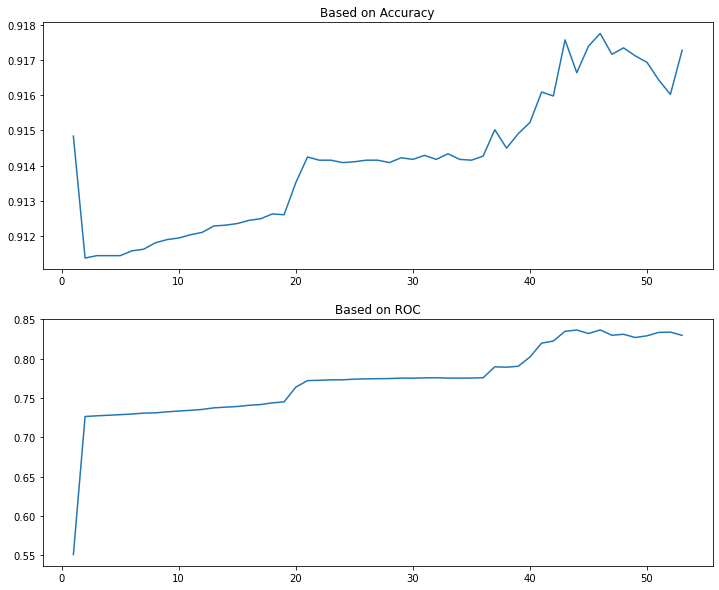

In [83]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.plot(range(1,X_train.shape[1]+1),rfe_acc.grid_scores_)
plt.title("Based on Accuracy")

plt.subplot(2,1,2)
plt.plot(range(1,X_train.shape[1]+1),rfe_roc.grid_scores_)
plt.title("Based on ROC")

plt.show()

In [84]:
print("No of Features Based on Accuracy :",rfe_acc.n_features_)
print("No of Features Based on ROCAUC :",rfe_roc.n_features_)

No of Features Based on Accuracy : 46
No of Features Based on ROCAUC : 46


We can observe both the RFECV models result in the same No of Features 46

But by observation the accuracy for any no of Features is above 90% and based on ROCAUC the score is somewhat stable around (30,40) features of value 0.75. so ,we will select 44 features and we will move furthur with these features.Also note that these are scores obtained when the cutoff is 0.5.

In [85]:
# let's run the model based on 44 fetures by RFE:
from sklearn.feature_selection import RFE
rfe=RFE(estimator=log,n_features_to_select=44)
rfe=rfe.fit(X_train,y_train)

In [86]:
colmns=X_train.columns[rfe.support_]
colmns

Index(['gender', 'no_of_trainings', 'previous_year_rating', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'department_Analytics',
       'department_Finance', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_16',
       'region_region_17', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_23',
       'region_region_24', 'region_region_25', 'region_region_26',
       'region_region_27', 'region_region_28', 'region_region_29',
       'region_region_31', 'region_region_32', 'region_region_33',
       'region_region_34', 'region_region_4', 'region_region_5',
       'region_region_6', 'region_region_7', 'region_region_8',
       'region_region_9', 'education_Bachelor's', 'education_Master's & above',
       'recruitment_channel_other',

In [87]:
X_train=X_train[colmns]
X_test=X_test[colmns]
print("train columns :",X_train.shape[1])
print("Test columns :",X_test.shape[1])

train columns : 44
Test columns : 44


In [88]:
logreg=log.fit(X_train,y_train)
logreg.score(X_train,y_train)

0.9173014642156639

In [89]:
print(classification_report(y_train,logreg.predict(X_train)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     40112
           1       0.55      0.15      0.24      3734

    accuracy                           0.92     43846
   macro avg       0.74      0.57      0.60     43846
weighted avg       0.89      0.92      0.90     43846



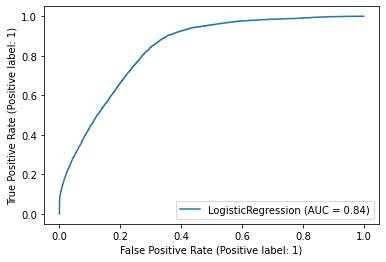

In [90]:
plot_roc_curve(estimator=logreg,X=X_train,y=y_train)
plt.show()

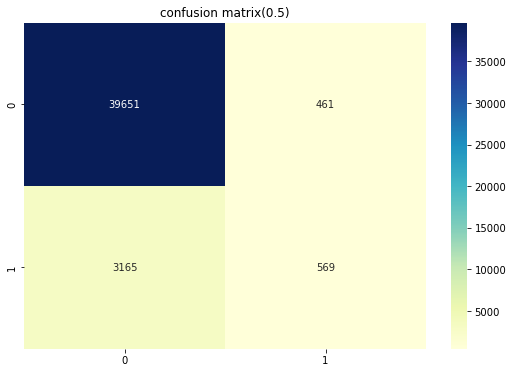

In [91]:
plt.figure(figsize=(9,6))
sns.heatmap(confusion_matrix(y_train,logreg.predict(X_train)),annot=True,fmt='d',cmap='YlGnBu')
plt.title("confusion matrix(0.5)")
plt.show()

In [92]:
t1=pd.DataFrame(logreg.predict_proba(X_train))
t1.head()

,0,1
0,0.975693,0.024307
1,0.878404,0.121596
2,0.894600,0.105400
3,0.956102,0.043898
4,0.976245,0.023755


In [93]:
# let's Create a Data Frame of Predictions and probabilities and Actual values :
prdctns=pd.DataFrame(y_train.index)
prdctns['Actual_values']=y_train.values
prdctns=pd.concat([prdctns,t1[1]],axis=1)
prdctns['probs']=t1[1]
prdctns.drop(1,axis=1,inplace=True)
prdctns['prdctns_deflt']=logreg.predict(X_train)
prdctns.head(10)

,0,Actual_values,probs,prdctns_deflt
0,25890,0,0.024307,0
1,24121,0,0.121596,0
2,483,0,0.105400,0
3,14389,0,0.043898,0
4,45182,0,0.023755,0
5,13823,0,0.018782,0
6,38673,0,0.250060,0
7,50474,0,0.208329,0
8,13672,0,0.023981,0
9,28380,1,0.130476,0


In [94]:
nos=[float(i)/10 for i in list(range(10))]
for i in nos:
    prdctns[i]=prdctns.probs.map(lambda x:0 if x<i else 1)
prdctns.head(10)

,0,Actual_values,probs,prdctns_deflt,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0,0.024307,0,0,0,0,0,0,0,0,0,0
1,1,0,0.121596,0,1,0,0,0,0,0,0,0,0
2,1,0,0.105400,0,1,0,0,0,0,0,0,0,0
3,1,0,0.043898,0,0,0,0,0,0,0,0,0,0
4,1,0,0.023755,0,0,0,0,0,0,0,0,0,0
5,1,0,0.018782,0,0,0,0,0,0,0,0,0,0
6,1,0,0.250060,0,1,1,0,0,0,0,0,0,0
7,1,0,0.208329,0,1,1,0,0,0,0,0,0,0
8,1,0,0.023981,0,0,0,0,0,0,0,0,0,0
9,1,1,0.130476,0,1,0,0,0,0,0,0,0,0


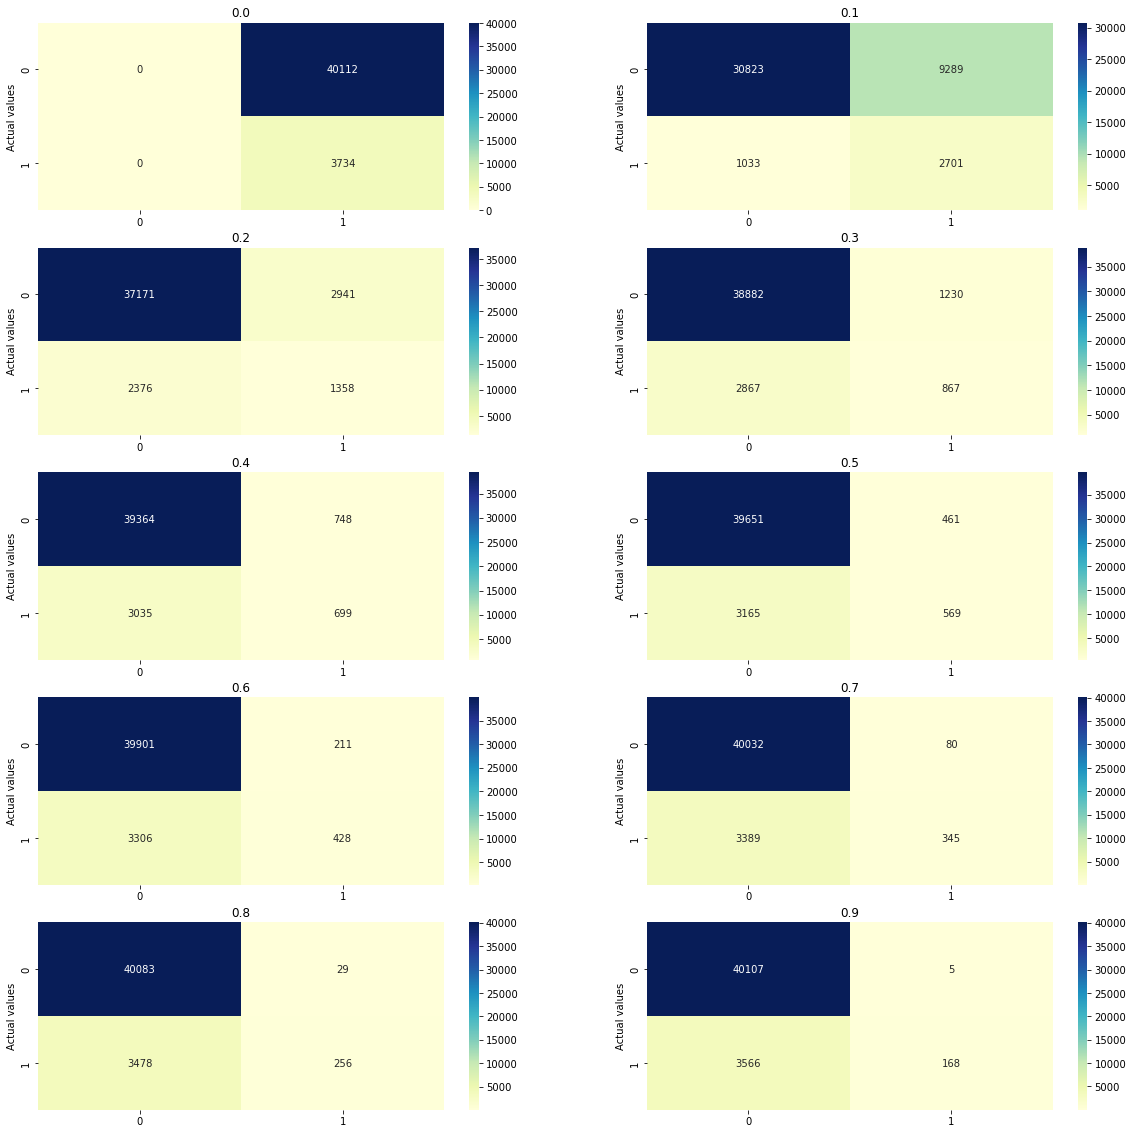

In [95]:
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(5,2,i+1)
    sns.heatmap(confusion_matrix(prdctns.Actual_values,prdctns[i/10]),annot=True,fmt='d',cmap="YlGnBu")
   # plt.xlabel("predicted values")
    plt.ylabel("Actual values")
    plt.title(i/10)
plt.show()

In [96]:
# Let's look at the optimum cutoff value based on the sensitivity and specificity tradeoff :
nos=[i/10 for i in range(10) ]
sensitivity=[]
specivicity=[]
Recall=[]
precision=[]
accuracy=[]
for i in nos :
    matrx=confusion_matrix(prdctns.Actual_values,prdctns[i])
    tn=matrx[0][0]
    tp=matrx[1][1]
    fp=matrx[0][1]
    fn=matrx[1][0]
    sensi=tp/(tp+fn)
    sensitivity.append(sensi)
    speci=tn/(tn+fp)
    specivicity.append(speci)
    prec=tp/(tp+fp)
    precision.append(prec)
    recal=tp/(tp+fn)
    Recall.append(recal)
    acc=(tp+tn)/(tp+tn+fp+fn)
    accuracy.append(acc)
cutoff=pd.DataFrame()
cutoff['cutoffs']=nos
cutoff['sensitivity']=sensitivity
cutoff['specivicity']=specivicity
cutoff['Recall']=Recall
cutoff['precision']=precision
cutoff['accuracy']=accuracy
cutoff

,cutoffs,sensitivity,specivicity,Recall,precision,accuracy
0,0.0,1.000000,0.000000,1.000000,0.085162,0.085162
1,0.1,0.723353,0.768423,0.723353,0.225271,0.764585
2,0.2,0.363685,0.926680,0.363685,0.315887,0.878735
3,0.3,0.232191,0.969336,0.232191,0.413448,0.906559
4,0.4,0.187199,0.981352,0.187199,0.483068,0.913721
5,0.5,0.152384,0.988507,0.152384,0.552427,0.917301
6,0.6,0.114622,0.994740,0.114622,0.669797,0.919787
7,0.7,0.092394,0.998006,0.092394,0.811765,0.920882
8,0.8,0.068559,0.999277,0.068559,0.898246,0.920016
9,0.9,0.044992,0.999875,0.044992,0.971098,0.918556


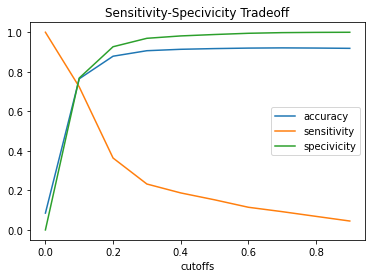

In [97]:
cutoff.plot.line(x='cutoffs', y=['accuracy','sensitivity','specivicity'])
plt.title("Sensitivity-Specivicity Tradeoff")
plt.show()

By observing the Graph above the Sensitivity-Specivicity cutoff is approx 0.1

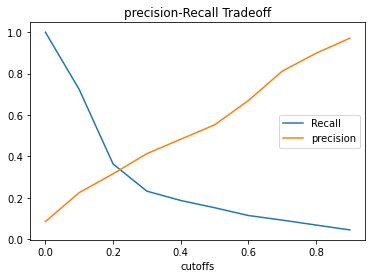

In [98]:
cutoff.plot.line(x='cutoffs', y=['Recall','precision'])
plt.title("precision-Recall Tradeoff")
plt.show()

By observing the Graph above the Precision-Recall cutoff is approx 0.2

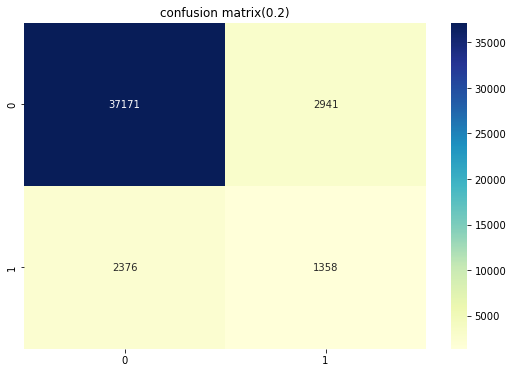

In [99]:
plt.figure(figsize=(9,6))
sns.heatmap(confusion_matrix(prdctns.Actual_values,prdctns[0.2]),annot=True,fmt='d',cmap='YlGnBu')
plt.title("confusion matrix(0.2)")
plt.show()

In [100]:
print("ROCAUC for 0.2 cutoff for train set:",roc_auc_score(prdctns.Actual_values,prdctns[0.2]))

ROCAUC for 0.2 cutoff for train set: 0.6451826757067357


In [101]:
cross_val_score(estimator=logreg,X=X_train,y=y_train,cv=4,scoring='roc_auc')

array([0.83477345, 0.83914985, 0.83816178, 0.83802652])

It looks like the model is stable with avg ROCAUC approx 77.50%

In [102]:
#Let's apply on validation set with cutoffs 0.5 and 0.2 :
y_pred=logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10028
           1       0.50      0.14      0.21       934

    accuracy                           0.91     10962
   macro avg       0.71      0.56      0.58     10962
weighted avg       0.89      0.91      0.89     10962



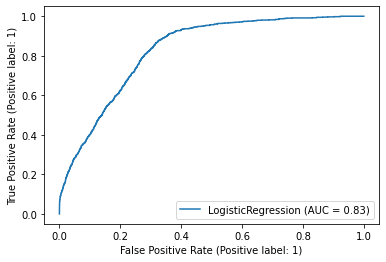

In [103]:
plot_roc_curve(estimator=logreg,X=X_test,y=y_test)
plt.show()

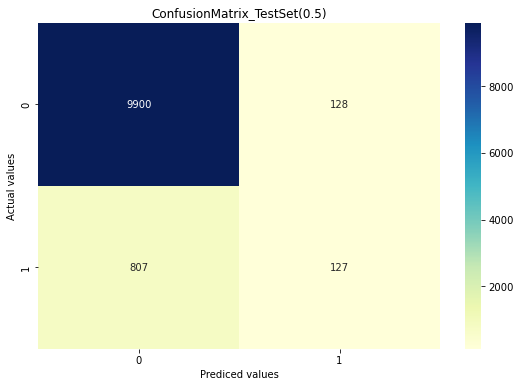

In [104]:
plt.figure(figsize=(9,6))
sns.heatmap(confusion_matrix(y_test,y_pred),fmt='d',annot=True,cmap='YlGnBu')
plt.xlabel('Prediced values')
plt.ylabel('Actual values')
plt.title("ConfusionMatrix_TestSet(0.5)")
plt.show()

In [105]:
y_pred_prob=pd.DataFrame(logreg.predict_proba(X_test))
y_pred_prob.drop(0,axis=1,inplace=True)
y_pred_prob['probs']=y_pred_prob[1]
y_pred_prob.drop(1,axis=1,inplace=True)
y_pred_prob.head()

,probs
0,0.114249
1,0.060510
2,0.019625
3,0.061408
4,0.016007


In [106]:
y_pred_prob[0.2]=y_pred_prob.probs.map(lambda x:0 if x<0.2 else 1)
y_pred_prob.head()

,probs,0.2
0,0.114249,0
1,0.060510,0
2,0.019625,0
3,0.061408,0
4,0.016007,0


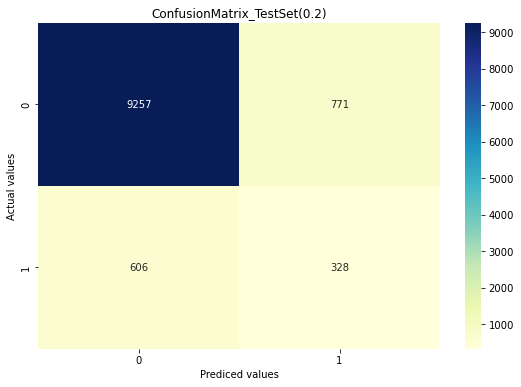

In [107]:
plt.figure(figsize=(9,6))
sns.heatmap(confusion_matrix(y_test,y_pred_prob[0.2]),fmt='d',annot=True,cmap='YlGnBu')
plt.xlabel('Prediced values')
plt.ylabel('Actual values')
plt.title("ConfusionMatrix_TestSet(0.2)")
plt.show()

In [108]:
print("ROCAUC for 0.2 cutoff on test set :",roc_auc_score(y_test,y_pred_prob[0.2]))

ROCAUC for 0.2 cutoff on test set : 0.6371465037082464


We can observe that the ROC scores for both the Train and Test sets are 63% tells that it is not overfitting but it is not that much high for performance .The reason may be it is Imbalanced data , so we need to try Sampling methods for Imbalance and also we have an option to run stats generalized linear model for the statistical significances of the coefficients.

In [109]:
# Let's apply it to the Given Test set :
X=Xfnl[colmns]
y_fnl_prob=pd.DataFrame(logreg.predict_proba(X))
y_fnl_prob.drop(0,axis=1,inplace=True)
y_fnl_prob['probs']=y_fnl_prob[1]
y_fnl_prob.drop(1,axis=1,inplace=True)
y_fnl_prob.head()

,probs
0,0.086139
1,0.014058
2,0.024670
3,0.005200
4,0.016966


In [110]:
y_fnl_prob[0.2]=y_fnl_prob.probs.map(lambda x:0 if x<0.2 else 1)
y_fnl_prob.head()

,probs,0.2
0,0.086139,0
1,0.014058,0
2,0.024670,0
3,0.005200,0
4,0.016966,0


In [111]:
pd.DataFrame(y_fnl_prob[0.2]).to_excel(r"HrAnalyticsprediction.xlsx")
print('Predicted values is written to Excel File successfully.')

Predicted values is written to Excel File successfully.


            ----------------------------------------------------------------------------------------------------

### Conclusion :
  *  Missing Values Imputation is done using Weight of Evidence
  *  Feature selection is done using Recursive Feature Elimination Cross Validation based on the ROC score.
  *  We look at the Sensitivity-Specificity and Precision-Recall Tradeoffs to find the optimum cutoff value.
  *  Cross validation scheme is used to check whether the Model is stable or not based on ROC score.
  *  Finally we predicted the Test set based on the obtained cutoff value.